In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np # math
import matplotlib.pyplot as plt # graphs and plots
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.dates as mdates
from src.utils.profiles_from_schedule_new import SimParam # class for show-up generator

In [2]:
simparam = SimParam()
path_to_6k_sched = (
    r"/home/antoine/projects/"
    "KAPpaxsim/KAPpaxsim/data/"
    "processed/Schedule (30th terminal peak, 6000 pax)_PROCESSED.xlsx"
)
simparam.schedule_from_path(path_to_6k_sched)
simparam.schedule_cleanup()
simparam.schedule_filter()

simparam.show_up_from_file()
simparam.assign_flight_show_up_category_default()

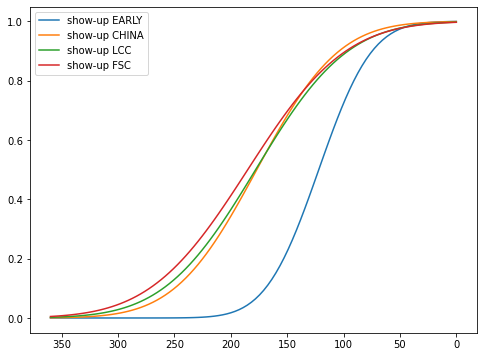

In [3]:
simparam.plot_show_up_categories_profiles()

In [4]:
simparam.assign_show_up()

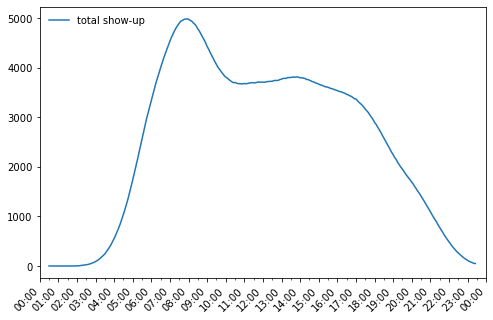

In [5]:
simparam.plot_df_Pax()

In [6]:
simparam.assign_check_in()

<AxesSubplot:>

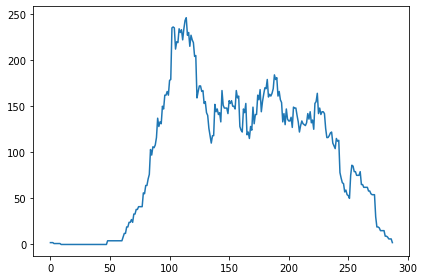

In [7]:
import seaborn as sns
simparam.df_Counters['total'].plot()

<AxesSubplot:>

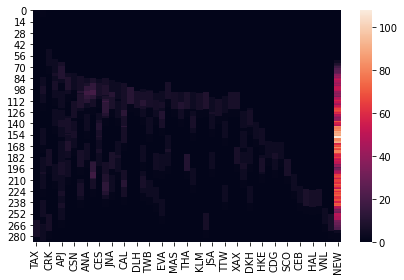

In [8]:
test = simparam.df_Counters.drop(columns='total')
sns.heatmap(test)

In [59]:
simparam.dct_resource = {
    'kiosk' : 92
}

simparam.dct_processes = {
    'kiosk' : 5
}

In [60]:
simparam.df_Pax

,Flight Number,time,Scheduled Time,Category,Pax,minutes
0,TAX 611,2020-10-13 18:26:45,2020-10-13 00:10:00,FSC,1,1106.750000
1,TAX 611,2020-10-13 18:33:39,2020-10-13 00:10:00,FSC,1,1113.650000
2,TAX 611,2020-10-13 18:39:18,2020-10-13 00:10:00,FSC,1,1119.300000
3,TAX 611,2020-10-13 18:44:03,2020-10-13 00:10:00,FSC,1,1124.050000
4,TAX 611,2020-10-13 18:48:13,2020-10-13 00:10:00,FSC,1,1128.216667
...,...,...,...,...,...,...
57543,NEW 134,2020-10-13 10:38:32,2020-10-13 11:30:00,FSC,1,638.533333
57544,NEW 134,2020-10-13 10:43:10,2020-10-13 11:30:00,FSC,1,643.166667
57545,NEW 134,2020-10-13 10:48:34,2020-10-13 11:30:00,FSC,1,648.566667
57546,NEW 134,2020-10-13 10:55:02,2020-10-13 11:30:00,FSC,1,655.033333


In [61]:
simparam.prepare_schedule_for_simulation()

In [62]:
from src.simfunc.KIX_T1d_CUSBD_new import Pax, Simulation

In [79]:
simulation = Simulation(simparam)
simulation.generate_pax()

In [80]:
end_time = 1500

with tqdm(total=end_time - 1, desc="Simulation running...") as runpbar:
    for i in range(1, end_time):
        simulation.env.run(until=i)
        runpbar.update(1)



Simulation running...: 100%|██████████| 1499/1499 [05:26<00:00,  4.59it/s]


In [81]:
df = pd.concat([ pax.row for pax in simulation.pax_list],axis=1).transpose()


In [102]:
simulation.format_df_result()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

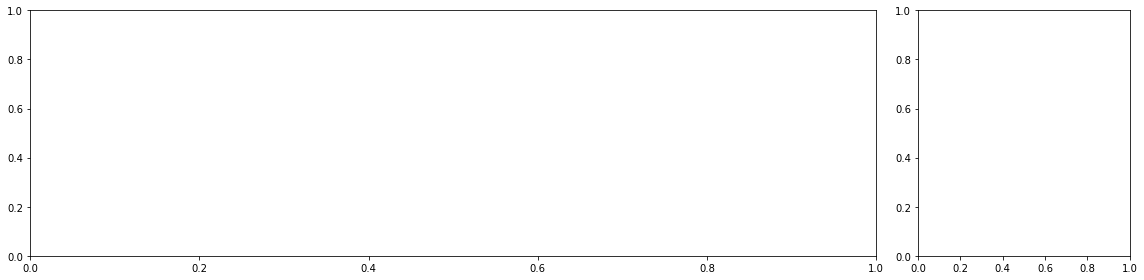

In [103]:
simulation.plot_result()